# speech recognition practices

## Display the waveforms

In [16]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from librosa import display

In [17]:
# declering the path of the audio file (Here the file is in the same directory)
path = "Rocky.wav"
ipd.Audio(path)

In [19]:
# we use the load function in order to load a file in librosa
# in load function you can declare sr which is the sample rate, the defult 22050
rocky, sr = librosa.load(path, sr=22050)

In [20]:
rocky

array([ 8.13060552e-08, -9.60379225e-08,  1.05146825e-07, ...,
        4.32279734e-07, -2.97661217e-07,  1.75654563e-07], dtype=float32)

In [21]:
# How many samples we have in our signal ? 
rocky.size

1035744

In [22]:
# In order to find a sample duration we use the following commands
sample_duration = 1/sr
print(f'The duration of one sample is : {sample_duration:.5f} seconds')

The duration of one sample is : 0.00005 seconds


In [23]:
# You can calculate the duration of audio signal in seconds via the following code
# signal_doration = one_sample_duration * number_of_samples
signal_duration = sample_duration * len(rocky)
print(f'The duration of the signal is : {signal_duration:.2f} seconds')

The duration of the signal is : 46.97 seconds


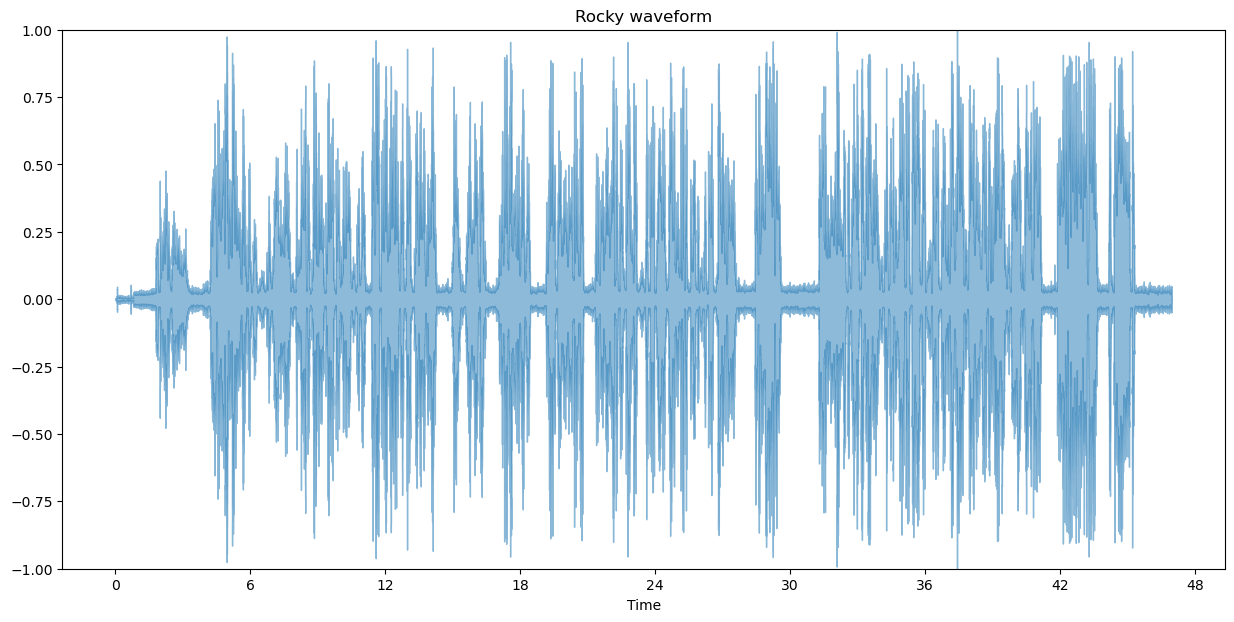

In [29]:
# In order to display the waveform follow the following descriptions: 
# 1) declare your figure size 
plt.figure(figsize = (15, 7))
# 2) Use waveshow with the following parameters : Name and Transparency
librosa.display.waveshow(rocky, alpha = 0.5)
# 3) Select a title for your plot
plt.title("Rocky waveform")
# 4) Limit the y-axis with your desirable numbers
plt.ylim((-1, 1))
# 5) display your waveform
plt.show()

## Another way for displaying the waveform

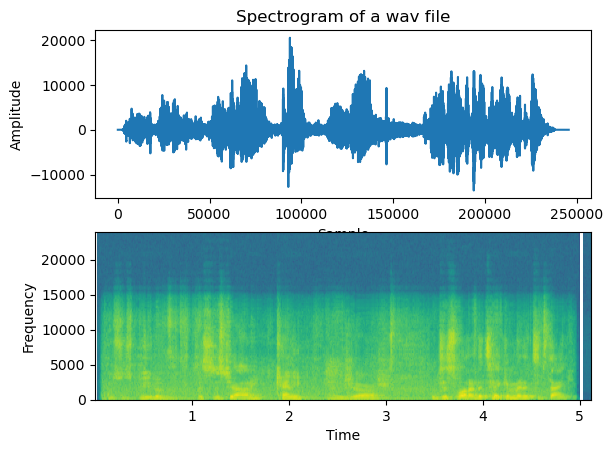

In [80]:
# Note that here the audio have been changed
import matplotlib.pyplot as plot
from scipy.io import wavfile

# Read the wav file 
samplingFrequency, signalData = wavfile.read('Conference.wav')

# Plot the signal read from wav file
plot.subplot(211)
plot.title('Spectrogram of a wav file')
plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Amplitude')

 
plot.subplot(212)
plot.specgram(signalData,Fs=samplingFrequency)
plot.xlabel('Time')
plot.ylabel('Frequency')

plot.show()

# Extracting Features 

## 1. Amplitude Envelope(AE): 

In [46]:
# Defined your frame and shift size
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    # The loop goes from 0 to signal size with the hop length steps and will find the maximum among them in the each frame
    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [47]:
ae_Rocky = amplitude_envelope(rocky, FRAME_SIZE, HOP_LENGTH)
# The len of this array is the number of frams in the signal which can be alter if we change the FRAME_SIZE or the SIFT_SIZE
# number of feature = number of samples / SHIFT_SIZE ---> 1035744 / 512 = 2023
len(ae_Rocky)

2023

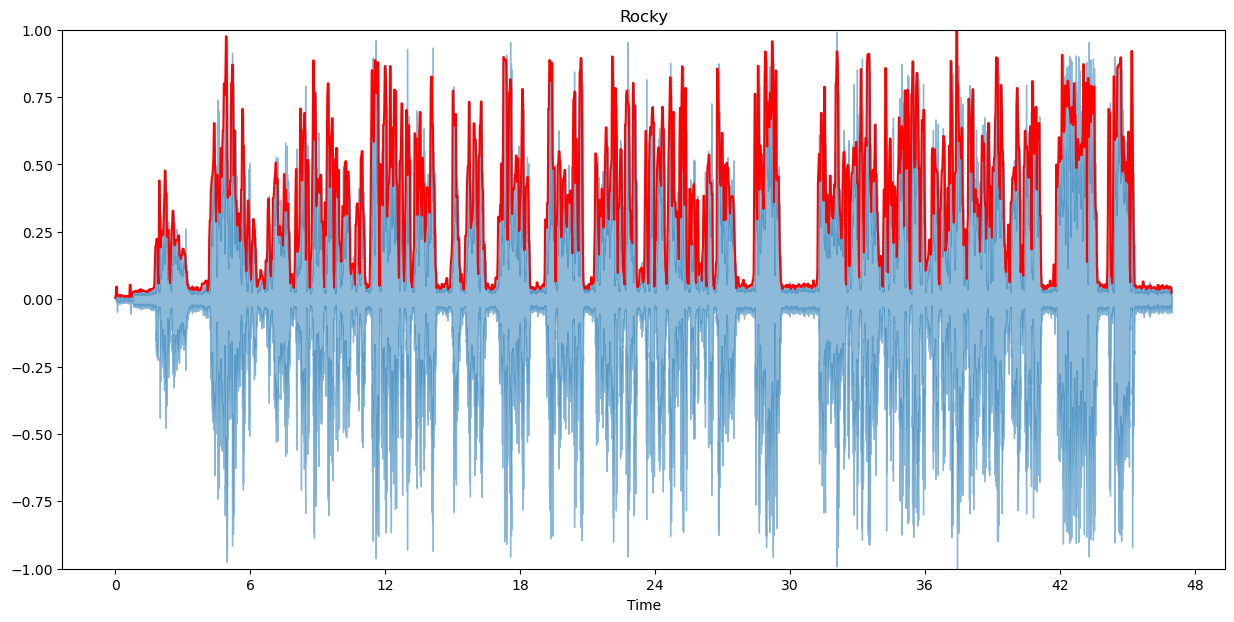

In [49]:
# visulise amplitude envelope 

# for our plot we need a time as x-axis so :
frames = range(0, ae_Rocky.size)
# librosa.frames_to_time -> changes the frame numbers to time
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# plot the result like before:
plt.figure(figsize = (15, 7))
librosa.display.waveshow(rocky, alpha = 0.5)
plt.plot(t, ae_Rocky, color = "r")
plt.title("Rocky")
plt.ylim((-1,1))
plt.show()

## 2. Root-Mean-Square Energy (RMSE):

In [63]:
rms_feature = librosa.feature.rms(y=rocky, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_feature.shape

(2023,)

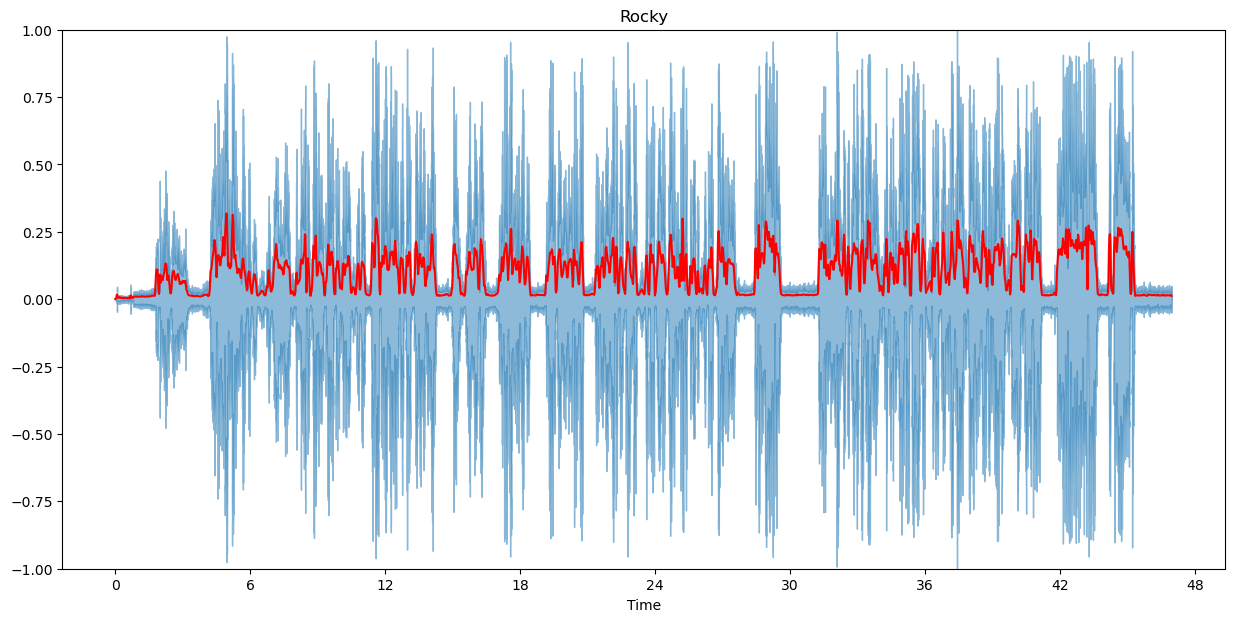

In [67]:
# plot RMSE

# for our plot we need a time as x-axis so :
frames = range(len(rms_feature))
# librosa.frames_to_time -> changes the frame numbers to time
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# plot the result like before:
plt.figure(figsize = (15, 7))

librosa.display.waveshow(rocky, alpha = 0.5)
plt.plot(t, rms_feature, color = "r")
plt.title("Rocky")
plt.ylim((-1,1))
plt.show()

## 3. Zero crossing rate (ZCR):

In [69]:
zcr_feature = librosa.feature.zero_crossing_rate(y=rocky, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_feature.shape

(2023,)

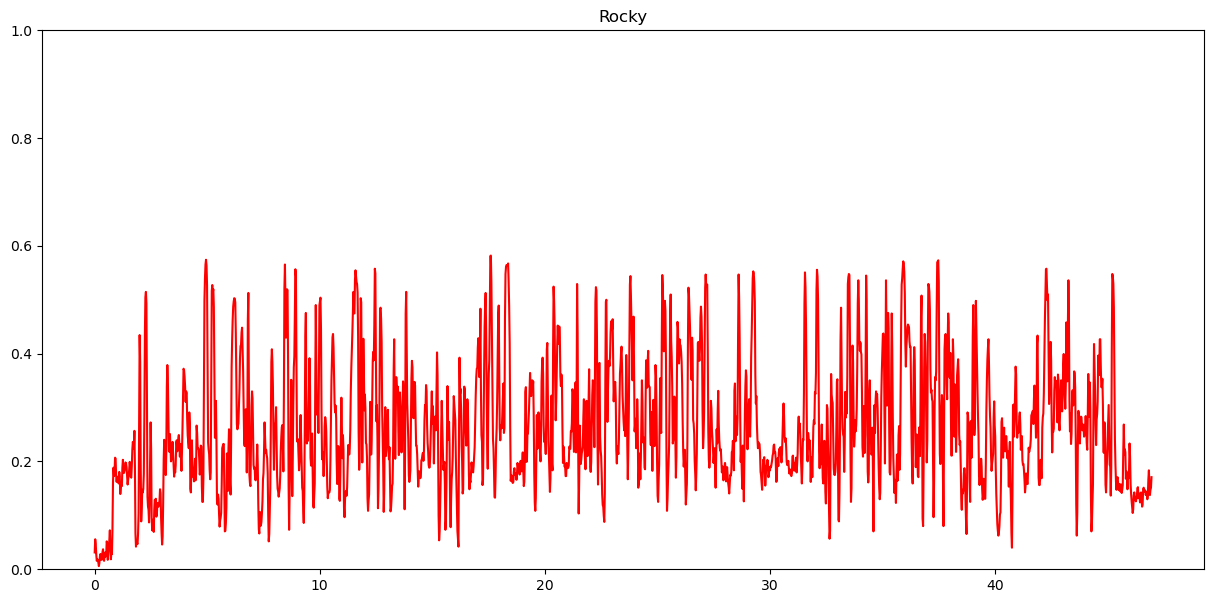

In [71]:
plt.figure(figsize = (15, 7))

# librosa.display.waveshow(rocky, alpha = 0.5)
plt.plot(t, zcr_feature, color = "r")
plt.title("Rocky")
plt.ylim((0,1))
plt.show()

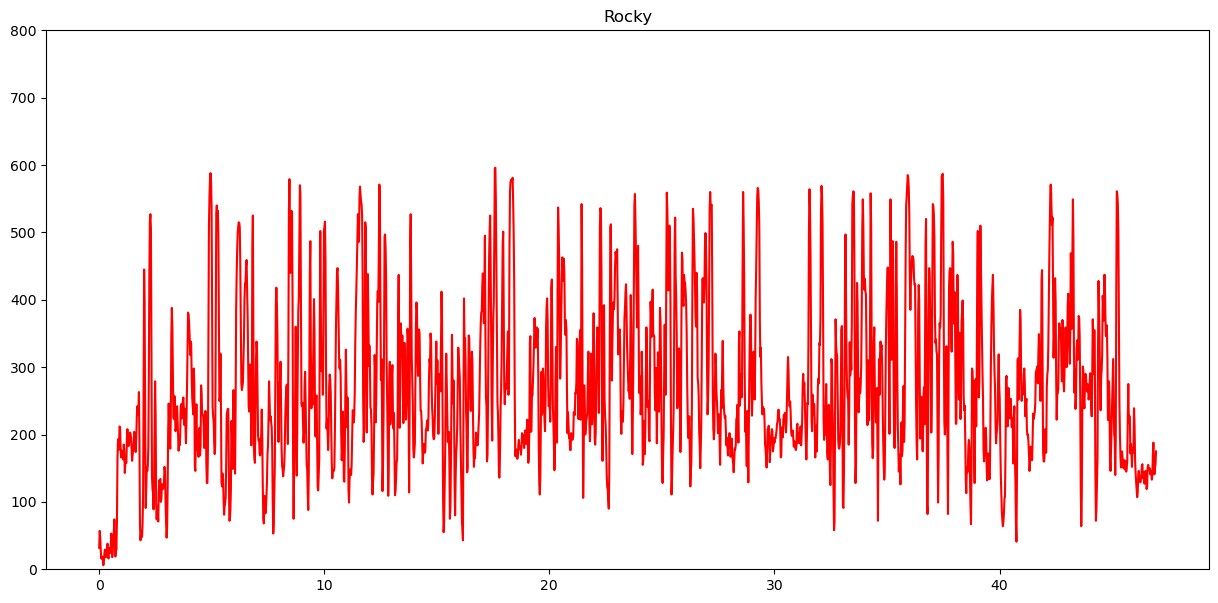

In [78]:
# for actuall ZCR we can: (zcr_feature * FRAME_SIZE)
plt.figure(figsize = (15, 7))
plt.plot(t, zcr_feature * FRAME_SIZE, color = "r")
plt.title("Rocky")
plt.ylim((0,800))
plt.show()

## Center Clipping

In [77]:
FRAME_LENGTH = 512

def get_clipping_level(signal, frame_length):
    clip_levels = []
    three_fold = int(np.ceil(frame_length/3.))
    
    for i in range(0, len(signal), frame_length):
    
        if i+frame_length > len(signal):
            frame_length = len(signal)-i+1
            three_fold = int(np.ceil(frame_length/3.))
        
        begin = max(abs(signal[i:i+three_fold]))
        end = max(abs(signal[i+frame_length-three_fold: i+ frame_length]))
        choice = min(begin, end)
        
        final_clip = 0.7*choice
        
        clip_levels.append(final_clip)
    
    return np.array(clip_levels)